In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 16
path = Path('../data/state-farm-distracted-driver-detection/')

In [135]:
data = (
    ImageDataBunch.from_folder(path, train='train', test='test', valid_pct=0.2,
                               classes=['c0', 'c1', 'c2', 'c3', 'c4', 
                                        'c5', 'c6', 'c7', 'c8', 'c9'], 
                               ds_tfms=get_transforms(), size=224, bs=bs).
    normalize(imagenet_stats)
)

/home/kai/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your train set contained the following unknown labels, the corresponding items have been discarded.
test
  if getattr(ds, 'warn', False): warn(ds.warn)
/home/kai/anaconda3/envs/fastai/lib/python3.7/site-packages/fastai/data_block.py:534: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
test
  if getattr(ds, 'warn', False): warn(ds.warn)


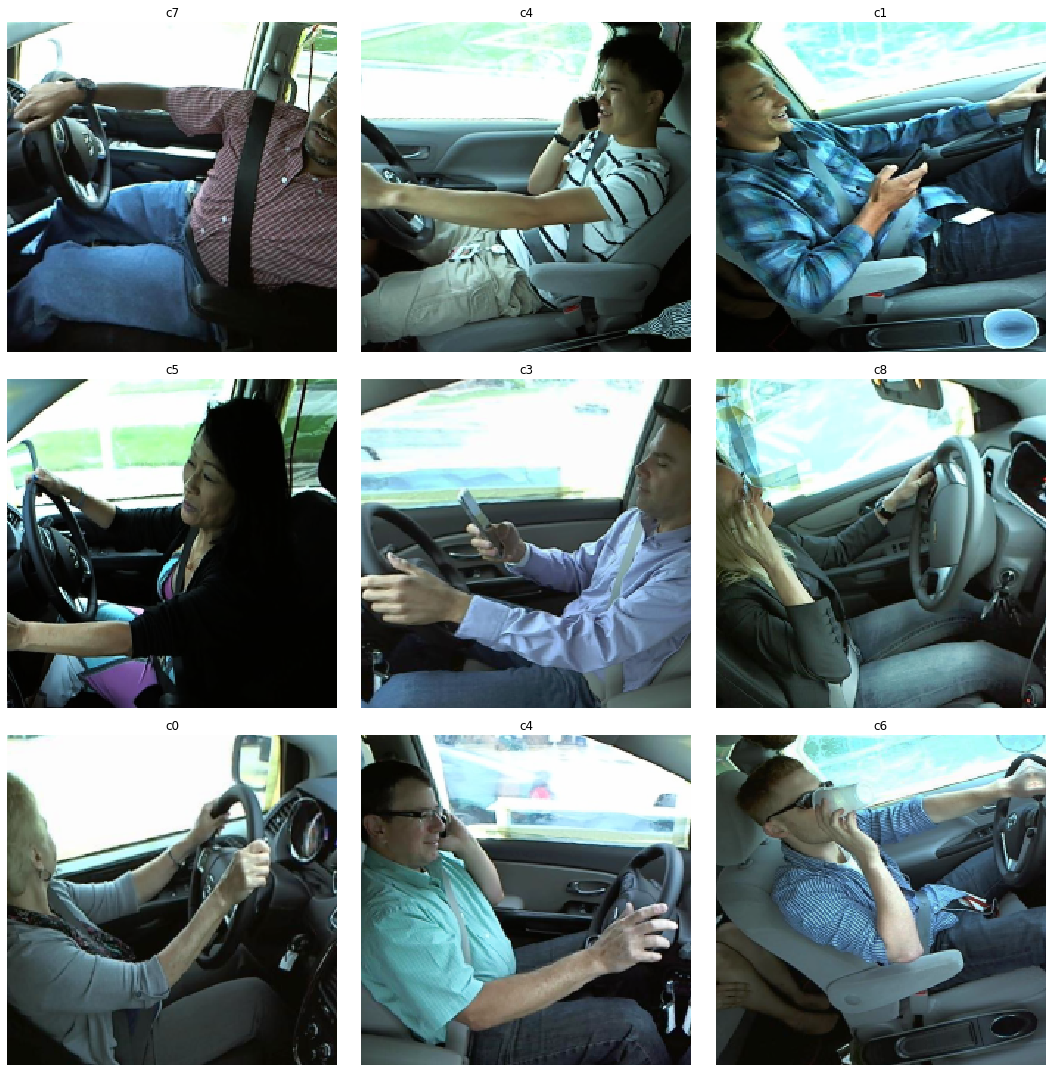

In [136]:
data.show_batch(rows=3, figsize=(15, 15))

In [138]:
data.classes, data.c, len(data.train_ds), len(data.test_ds)

(['c0', 'c1', 'c2', 'c3', 'c4', 'c5', 'c6', 'c7', 'c8', 'c9'],
 10,
 17974,
 79726)

In [139]:
data.test_ds

LabelList (79726 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: ../data/state-farm-distracted-driver-detection

In [140]:
data.train_ds

LabelList (17974 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
c2,c2,c2,c2,c2
Path: ../data/state-farm-distracted-driver-detection

In [141]:
learner = cnn_learner(data, models.resnet50, metrics=error_rate)

In [142]:
learner.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.678514,0.293502,0.093258,01:36
1,0.289455,0.101347,0.029438,01:37
2,0.174108,0.050823,0.013933,01:37
3,0.142291,0.042481,0.011236,01:39


In [143]:
learner.save('sf-distdriver-stage-1')

In [144]:
learner.unfreeze()

In [145]:
interp = ClassificationInterpretation.from_learner(learner)

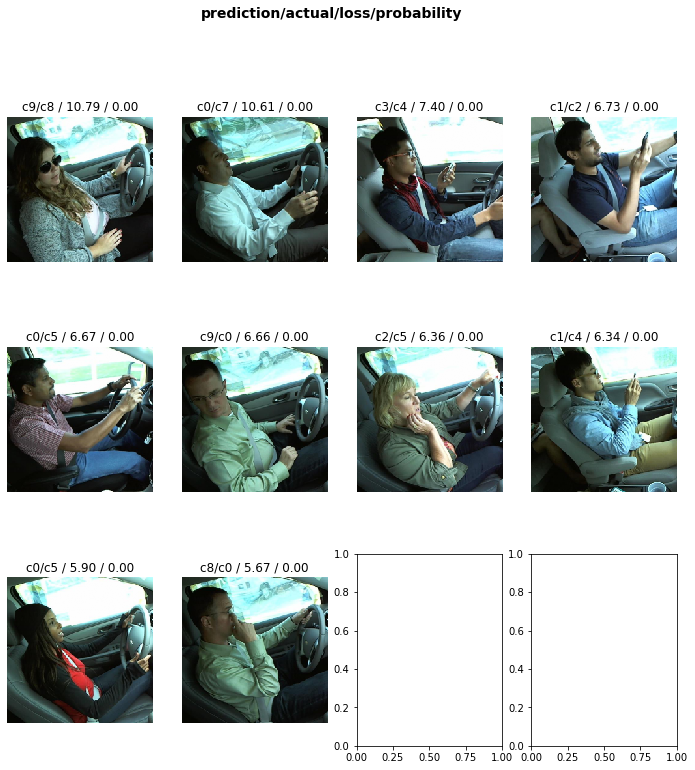

In [146]:
interp.plot_top_losses(10)

In [147]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


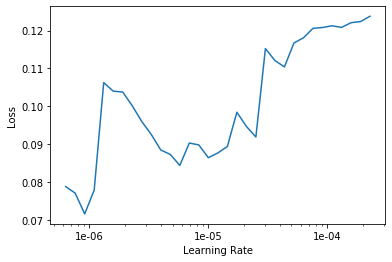

In [148]:
learner.recorder.plot()

In [149]:
learner.fit_one_cycle(2, max_lr=slice(1e-06, 1e-05))

epoch,train_loss,valid_loss,error_rate,time
0,0.114040,0.036299,0.007865,02:13
1,0.066359,0.033203,0.007865,02:15


In [150]:
learner.save('sf-distdriver-stage-2')

In [151]:
preds, y = learner.get_preds(DatasetType.Test)

In [166]:
preds

tensor([[8.2447e-07, 9.9994e-01, 3.4346e-08,  ..., 9.8608e-11, 8.3858e-08,
         1.1965e-08],
        [2.5079e-09, 2.0427e-09, 2.2467e-09,  ..., 1.2875e-09, 9.9999e-01,
         5.6333e-06],
        [9.9043e-01, 7.7791e-08, 1.0054e-06,  ..., 3.1172e-05, 3.4758e-04,
         7.1116e-03],
        ...,
        [1.1551e-03, 4.5091e-05, 1.4145e-07,  ..., 1.8157e-05, 6.3097e-06,
         5.8225e-04],
        [4.8412e-09, 2.6283e-11, 3.9719e-10,  ..., 4.3405e-09, 9.4532e-08,
         5.1620e-08],
        [9.1928e-04, 2.1880e-08, 1.0319e-08,  ..., 4.0228e-05, 3.8464e-04,
         9.9865e-01]])

In [163]:
def gen_sub(preds, data, filepath='../submission-statefarm-distdriver.csv',
            low=.02, high=.98):
    proba = [p for p in (np.clip(preds, low, high))]
    fname = [str(i).split('/')[-1] for i in data.test_dl.dataset.items]
    
    with open(filepath, 'w') as f:
        f.write('img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9\n')
        for i, file in enumerate(fname):
            f.write(file + ',')
            for j, val in enumerate(proba[i]):
                if j == len(proba[i]) - 1:
                    f.write(str(np.round(np.float(val), 3)) + '\n')
                else:
                    f.write(str(np.round(np.float(val), 3)) + ',')

In [164]:
gen_sub(preds, data, low=.05, high=.95)

In [26]:
[str(i).split('/')[-1] for i in data.test_dl.dataset.items]

['img_7603.jpg',
 'img_40950.jpg',
 'img_80199.jpg',
 'img_8176.jpg',
 'img_48346.jpg',
 'img_26394.jpg',
 'img_46640.jpg',
 'img_43791.jpg',
 'img_50135.jpg',
 'img_68663.jpg',
 'img_48573.jpg',
 'img_21156.jpg',
 'img_4108.jpg',
 'img_39437.jpg',
 'img_75895.jpg',
 'img_91145.jpg',
 'img_72195.jpg',
 'img_21448.jpg',
 'img_39693.jpg',
 'img_85439.jpg',
 'img_22955.jpg',
 'img_2368.jpg',
 'img_43726.jpg',
 'img_90929.jpg',
 'img_66364.jpg',
 'img_61380.jpg',
 'img_11404.jpg',
 'img_60089.jpg',
 'img_46635.jpg',
 'img_86858.jpg',
 'img_628.jpg',
 'img_61625.jpg',
 'img_24995.jpg',
 'img_73729.jpg',
 'img_69403.jpg',
 'img_19971.jpg',
 'img_13661.jpg',
 'img_47889.jpg',
 'img_11261.jpg',
 'img_31782.jpg',
 'img_78601.jpg',
 'img_35972.jpg',
 'img_60525.jpg',
 'img_49096.jpg',
 'img_73686.jpg',
 'img_80767.jpg',
 'img_54616.jpg',
 'img_88759.jpg',
 'img_94429.jpg',
 'img_27935.jpg',
 'img_34584.jpg',
 'img_72083.jpg',
 'img_96004.jpg',
 'img_80395.jpg',
 'img_97151.jpg',
 'img_11792.jpg'

In [133]:
preds

tensor([[2.6878e-26, 2.7647e-22, 1.6996e-26,  ..., 2.8535e-26, 2.0507e-25,
         1.0000e+00],
        [2.7682e-19, 4.2354e-18, 3.0123e-19,  ..., 2.5335e-10, 1.2966e-15,
         1.0000e+00],
        [9.0373e-11, 8.8130e-15, 9.5050e-17,  ..., 1.8212e-13, 2.6199e-09,
         1.0000e+00],
        ...,
        [2.3368e-21, 3.4883e-23, 1.1270e-24,  ..., 8.7108e-23, 1.7101e-21,
         1.0000e+00],
        [5.0107e-25, 2.4922e-26, 2.4709e-25,  ..., 2.3477e-23, 9.1547e-22,
         1.0000e+00],
        [4.6925e-10, 1.7876e-13, 6.9602e-14,  ..., 1.1219e-09, 1.7347e-08,
         1.0000e+00]])

In [134]:
preds[0]

tensor([2.6878e-26, 2.7647e-22, 1.6996e-26, 2.9483e-22, 4.8679e-27, 2.9666e-28,
        1.4954e-26, 4.4778e-24, 2.8535e-26, 2.0507e-25, 1.0000e+00])

In [156]:
foo = pd.read_csv('../submission-statefarm-distdriver.csv')

In [159]:
len(foo.columns)

11

In [162]:
[str(i).split('/')[-1] for i in data.test_dl.dataset.items]

['img_7603.jpg',
 'img_40950.jpg',
 'img_80199.jpg',
 'img_8176.jpg',
 'img_48346.jpg',
 'img_26394.jpg',
 'img_46640.jpg',
 'img_43791.jpg',
 'img_50135.jpg',
 'img_68663.jpg',
 'img_48573.jpg',
 'img_21156.jpg',
 'img_4108.jpg',
 'img_39437.jpg',
 'img_75895.jpg',
 'img_91145.jpg',
 'img_72195.jpg',
 'img_21448.jpg',
 'img_39693.jpg',
 'img_85439.jpg',
 'img_22955.jpg',
 'img_2368.jpg',
 'img_43726.jpg',
 'img_90929.jpg',
 'img_66364.jpg',
 'img_61380.jpg',
 'img_11404.jpg',
 'img_60089.jpg',
 'img_46635.jpg',
 'img_86858.jpg',
 'img_628.jpg',
 'img_61625.jpg',
 'img_24995.jpg',
 'img_73729.jpg',
 'img_69403.jpg',
 'img_19971.jpg',
 'img_13661.jpg',
 'img_47889.jpg',
 'img_11261.jpg',
 'img_31782.jpg',
 'img_78601.jpg',
 'img_35972.jpg',
 'img_60525.jpg',
 'img_49096.jpg',
 'img_73686.jpg',
 'img_80767.jpg',
 'img_54616.jpg',
 'img_88759.jpg',
 'img_94429.jpg',
 'img_27935.jpg',
 'img_34584.jpg',
 'img_72083.jpg',
 'img_96004.jpg',
 'img_80395.jpg',
 'img_97151.jpg',
 'img_11792.jpg'